In [13]:
import pandas as pd

In [90]:
with open("amazon-meta.txt") as f:
    c = 0
    lines = []
    
    tags_to_extract = ['title', 'similar', 'Id', 'ASIN', 'group', 'total', 'downloaded', 'avg rating', 'reviews']
    
    # Skip 3 lines
    for i in range(3):
        next(f)
        
    item = {}
    c = 0
    for line in f:
        # New item
        if line == '\n':
            lines.append(item)
            item = {}
            c += 1
            if c > 1:
                break
        
        if ':' in line:
            if any([1 for t in tags_to_extract if t in line]):
                tag, value = line.strip().split(':', 1)
                item[tag] = value.strip()

In [91]:
apple =pd.DataFrame(lines)

In [94]:
apple

,ASIN,Id,group,reviews,similar,title
0,0771044445,0,NaN,NaN,NaN,NaN
1,0827229534,1,Book,total: 2 downloaded: 2 avg rating: 5,5 0804215715 156101074X 0687023955 0687074...,Patterns of Preaching: A Sermon Sampler


In [95]:
d = {}
k = ''
pattern = "reviews:"
with open("amazon-meta.txt", 'r') as f:
    for line in f:
        if line.startswith(pattern):
            key, value = line.split(':', 1)
            d[k][key] = value.strip()
        else:
            k = line.strip()
            d[k] = {}

In [80]:
d = {}
k = ''
pattern = "reviews:"
with open("amazon-meta.txt", 'r') as f:
    for line in f:
        if line.startswith(pattern):
            k = line.strip()
            d[k] = {}
        else:
            key, value = line.split(':', 1)
            d[k][key] = value.strip()

ValueError: need more than 1 value to unpack

In [106]:
import re
review_stats = []

pattern ="reviews:"
with open("amazon-meta.txt", 'r') as f:
    for line in f:
        if pattern in line:
            _, value = line.split(':', 1)
            numbers = re.findall(r' : [0-9]+', value)
            numbers_clean = [float(x[1:].strip()) for x in numbers]
            ratings = {'total': numbers_clean[0],
                      'downloaded': numbers_clean[1],
                      'avg rating': numbers_clean[2],}
            review_stats.append(ratings)

IndexError: list index out of range

In [107]:
review_stats = []

pattern = "reviews:"
with open("amazon-meta.txt", 'r') as f:
    for line in f:
        if pattern in line:
            _, value = line.split(':',1)
            review_stats.append(value.strip())
          
                  

In [117]:
import re
review_stats = []

pattern ="reviews:"
with open("amazon-meta.txt", 'r') as f:
    for line in f:
        if pattern in line:
            _, value = line.split(':', 1)
            numbers = re.findall(r': [0-9]+', value)
            numbers_clean = [float(x[1:].strip()) for x in numbers]
            ratings = {'total': numbers_clean[0],
                      'downloaded': numbers_clean[1],
                      'avg_rating': numbers_clean[2],}
            review_stats.append(ratings)

In [118]:
import pandas as pd
review_data =pd.DataFrame(review_stats)
review_data.head()

,avg_rating,downloaded,total
0,5.0,2.0,2.0
1,4.0,12.0,12.0
2,5.0,1.0,1.0
3,4.0,1.0,1.0
4,0.0,0.0,0.0


In [115]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\lab\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [119]:
m = ols('avg_rating ~ downloaded',review_data).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3862.
Date:                Wed, 09 Aug 2017   Prob (F-statistic):               0.00
Time:                        19:37:11   Log-Likelihood:            -1.1290e+06
No. Observations:              542684   AIC:                         2.258e+06
Df Residuals:                  542682   BIC:                         2.258e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0438      0.003   1135.977      0.0

In [120]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

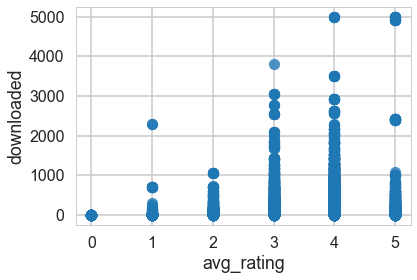

In [122]:
sns.regplot(y="downloaded", x="avg_rating", data=review_data, fit_reg = False)

In [ ]:
## the data demonstrates that those products with higher ratings have significantly more downloads.